In [6]:
import numpy as np
from matplotlib import pyplot as plt

## Neuron firing and biological noise

### Caso 1 
Firing rates with constant rate

In [ ]:
T = 100
signal = np.zeros(T+1)
lambda_0 = 1.2
t = 0

while t < T:
    
    # random uniforme entre (0,1)
    xi = np.random.uniform(low=np.nextafter(0.0, 1.0), high=1)
    # tiempo hasta siguiente señal
    s = -1 / lambda_0 * np.log(1 - xi)
    # avance de tiempo
    t = min(t + round(s),T)
    # señal random
    signal[t] = np.random.uniform(low=np.nextafter(0.0, 1.0), high=1)
    
plt.figure(figsize=(10,5))
plt.bar(np.arange(T+1),signal)
plt.show()

### Caso 2
Firing rates with low and high activity rates

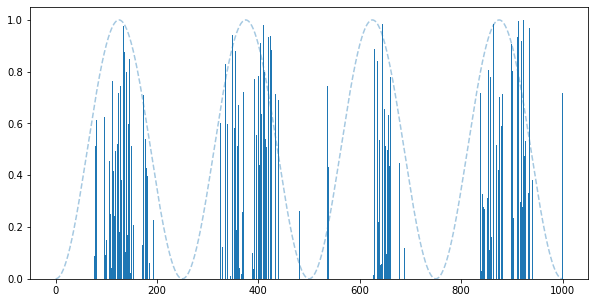

In [11]:
np.random.seed(10)
T = 1000
signal = np.zeros(T+1)
lambda_0 = 0.02
f = 0.002
t = 0

sin_val = lambda t: (np.sin(2*np.pi*f*t))**2
act = lambda t: (lambda_0 + sin_val(t)) if sin_val(t) > 0.5 else lambda_0

while t < T:
    
    #random uniforme entre (0,1)
    xi = np.random.uniform(low=np.nextafter(0.0, 1.0), high=1)
    lambda_ = act(t)
    s = -1 / lambda_ * np.log(1 - xi)
    t = min(t + round(s),T)
    signal[t] = np.random.uniform(low=np.nextafter(0.0, 1.0), high=1)

time = np.arange(T+1)
plt.figure(figsize=(10,5))
plt.bar(time, signal)
plt.plot(time, sin_val(time), '--', alpha=0.4)
plt.show()

### Caso 3
Firing rates with low and high activity rates

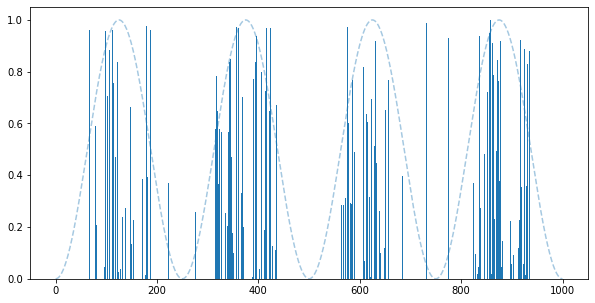

In [14]:
# np.random.seed(10)
T = 1000
signal = np.zeros(T+1)
lambda_0 = 0.02  #inicia con baja actividad
f = 0.002
t = 0

sin_val = lambda t: (np.sin(2*np.pi*f*t))**2
act = lambda t: (lambda_0 + sin_val(t)) if sin_val(t) > 0.5 else lambda_0

while t < T:
    
    #random uniforme entre (0,1)
    xi = np.random.uniform(low=np.nextafter(0.0, 1.0), high=1)
    p = -np.log(1 - xi)
    L = 0

    lambda_act = act(t)
    
    while L < p:
        
        lambda_next = act(t+1)
        dL = 0.5 * (lambda_act + lambda_next)
        L += dL
        lambda_act = lambda_next
        t += 1

    if t <= T:
        signal[t] = np.random.uniform(low=np.nextafter(0.0, 1.0), high=1)

time = np.arange(T+1)
plt.figure(figsize=(10,5))
plt.bar(time, signal)
plt.plot(time, sin_val(time), '--', alpha=0.4)
plt.show()